<a href="https://colab.research.google.com/github/KeonhoChu/Train/blob/main/CNN_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
0
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

ls -1ha /content/drive/MyDrive/kaggle.json #현재 존재하나요?

ls: cannot access '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle #make dir
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ #move kaggle.json->~/.kaggle (현재 경로에 있는 파일 ./)
#./.kaggle .폴더명 : 숨김폴더.
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json # r(read):4,write(w):2,exe(x):1
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
401 - Unauthorized


In [ ]:
!kaggle competitions download -c dogs-vs-cats

401 - Unauthorized


In [ ]:
!chmod /content/dogs-vs-cats.zip

chmod: missing operand after ‘/content/dogs-vs-cats.zip’
Try 'chmod --help' for more information.


In [ ]:
!unzip -d /content/dogs-vs-cats.zip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [ ]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip

In [ ]:
!unzip /content/test1.zip

In [ ]:
import pandas as pd
import os
filenames = os.listdir("/content/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,dog.3070.jpg,1
1,dog.9423.jpg,1
2,cat.7224.jpg,0
3,cat.1473.jpg,0
4,cat.2898.jpg,0


In [ ]:
df.shape

(25000, 2)

In [ ]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

<Axes: >

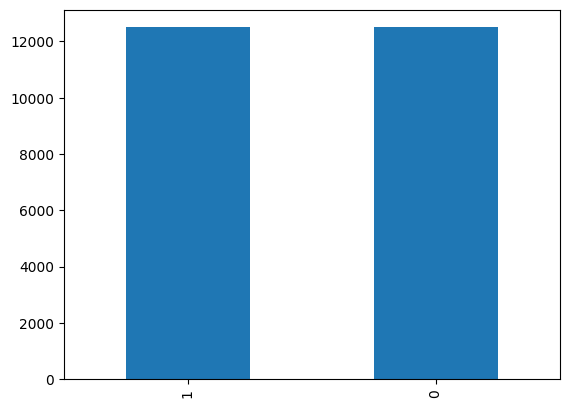

In [ ]:
df['category'].value_counts().plot.bar()

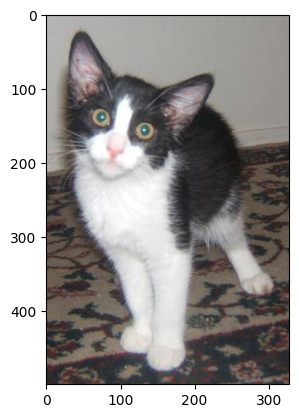

In [ ]:
from tensorflow.keras.utils import load_img
import random
import matplotlib.pyplot as plt
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

In [ ]:
#훈련,검증,테스트 폴더로 이미지 복사하기.
import os,shutil
#os : operation system / 운영체제와의 상호작용을 돕는 다양한 기능을 제공.
#참고 : https://docs.python.org/ko/3/library/os.html?highlight=os#module-os
#shutil : 파일,복사 etc
#참고 : https://docs.python.org/ko/3/library/shutil.html


original_dataset_dir = '/content/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir = '/content/cats_and_dogs_small' #소규모 데이터셋을 저장할 디렉터리.
os.mkdir(base_dir) #making dictory


In [ ]:
train_dir = os.path.join(base_dir,'train') # /content/cats_and_dogs_small/train
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation') #/content/cats_and_dogs_small/validation
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test') #/content/cats_and_dogs_small/test
os.mkdir(test_dir)
#훈련,검증, 테스트 분할을 위한 디렉토리.

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
#훈련용 고양이 사진 디렉토리

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
#훈련용 강아지 사진 디렉토리

In [ ]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
#검증용 고양이 사진 디렉토리

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
#검증용 강아지 사진 디렉토리

In [ ]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
#테스트용 고양이 사진 디렉토리

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)
#테스트용 강아지 사진 디렉토리

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # 처음 1000개의 고양이 이미지를 train_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)] #다음 500개의 고양이 이미지를 validation_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)] #다음 500개의 고양이 이미지를 test_cats_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

강아지에 대한 것

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] # 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)] # 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] # 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

- shape 이 다르다면 경로가 잘 못 잡힌 경우가 많음

In [ ]:
print('훈련용 고양이 이미지 전체 개수', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수', len(os.listdir(test_cats_dir)))

훈련용 고양이 이미지 전체 개수 1000
검증용 고양이 이미지 전체 개수 500
테스트용 고양이 이미지 전체 개수 500


In [ ]:
print('훈련용 강아지 이미지 전체 개수', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수', len(os.listdir(test_dogs_dir)))

훈련용 강아지 이미지 전체 개수 1000
검증용 강아지 이미지 전체 개수 500
테스트용 강아지 이미지 전체 개수 500


locals설명

In [ ]:
x = 5       # global scope

def myfunc():
    x = 10  # local scope
    print('x inside function is', x)

myfunc()
# Prints x inside function is 10

print('x outside function is', x)
# Prints x outside function is 5

x inside function is 10
x outside function is 5


In [ ]:
# Get the value of local variable 'x'
x = 10
print(locals()['x'])
# Prints 10

10


In [ ]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer= RMSprop(learning_rate = 1e-4), metrics = ['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale  = 1./255)
test_datagen = ImageDataGenerator(rescale  = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #타깃 디렉터리
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 20,
    class_mode = 'binary') #loss = binary_crossentropy ->이진 레이블이 필요함.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150), #모든 이미지 150X150으로 만듬
    batch_size = 20,
    class_mode = 'binary') #loss = binary_crossentropy ->이진 레이블이 필요함.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

def generator():
  i=0
  while True:
    i +=1
    yield i

In [ ]:
for item in generator():
  print(item)
  if item >4:
    break

1
2
3
4
5


In [ ]:
for data_batch,labels_batch in train_generator:
  print('배치 데이터 크기',data_batch.shape)
  print('배치 레이블 크기',labels_batch.shape)
  break

배치 데이터 크기 (20, 150, 150, 3)
배치 레이블 크기 (20,)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data= validation_generator,
    validation_steps = 50)

<ipython-input-72-b09ada923a36>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
100/100 [==============================] - 156s 2s/step - loss: 0.6910 - acc: 0.5190 - val_loss: 0.6839 - val_acc: 0.5610
Epoch 2/50
100/100 [==============================] - 148s 1s/step - loss: 0.6700 - acc: 0.5870 - val_loss: 0.6626 - val_acc: 0.5810
Epoch 3/50
100/100 [==============================] - 144s 1s/step - loss: 0.6556 - acc: 0.6015 - val_loss: 0.6744 - val_acc: 0.5770
Epoch 4/50
100/100 [==============================] - 152s 2s/step - loss: 0.6300 - acc: 0.6385 - val_loss: 0.6496 - val_acc: 0.5930
Epoch 5/50
100/100 [==============================] - 143s 1s/step - loss: 0.5951 - acc: 0.6760 - val_loss: 0.6046 - val_acc: 0.6630
Epoch 6/50
100/100 [==============================] - 146s 1s/step - loss: 0.5659 - acc: 0.7085 - val_loss: 0.7131 - val_acc: 0.5720
Epoch 7/50
100/100 [==============================] - 149s 1s/step - loss: 0.5450 - acc: 0.7200 - val_loss: 0.5894 - val_acc: 0.6870
Epoch 8/50
100/100 [==============================] - 148s 1s/step - 